# Analyse defects calculations with pynter

This example shows the analysis that can be performed starting from a `DefectsAnalysis` object, which contains all the information that is needed from the defect calculations. Check the other notebooks for the examples on how to create this object from the DFT data.

In [71]:
from pynter.defects.entries import SingleDefectEntry , get_defect_entry_from_jobs
from pynter.defects.analysis import DefectsAnalysis
from pynter.phase_diagram.analysis import Reservoirs, PDHandler
from pynter.tools.structure import view_structure_with_ase
from pynter.tools.utils import save_object_as_json, get_object_from_json
from pymatgen.electronic_structure.dos import FermiDos
from pynter.defects.thermodynamics import PartialPressureAnalysis
from pynter.defects.plotter import PartialPressurePlotter
from pymatgen.core.composition import Composition
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.analysis.defects.utils import kb

### Import DefectsAnalysis object

The object in this example contains the data for vacancies, substitutions and defect complexes for NaNbO3. Starting from the complete set it is possible to create other `DefectsAnalysis` objects with filtered defect entries to limit the dataset and focus on particular defect species.

In [2]:
da_all = get_object_from_json(DefectsAnalysis,'./data/NN_Pbcm_DA_all-defects.json')

### Visualize the defect entries with pandas

In [4]:
da_all.get_dataframe()

,symbol,delta atoms,charge,multiplicity
name,,,,
Sub_Ca_on_Na-Vac_Na_mult32,$Ca_{Na}$-$V_{Na}$,"{Na: -2.0, Ca: 1.0}",-1,32
Sub_Ca_on_Na-Vac_Na_mult32,$Ca_{Na}$-$V_{Na}$,"{Na: -2.0, Ca: 1.0}",0,32
Sub_Ca_on_Na-Vac_Na_mult32,$Ca_{Na}$-$V_{Na}$,"{Na: -2.0, Ca: 1.0}",1,32
Sub_Ca_on_Na_mult32,$Ca_{Na}$,"{Na: -1.0, Ca: 1.0}",0,32
Sub_Ca_on_Na_mult32,$Ca_{Na}$,"{Na: -1.0, Ca: 1.0}",1,32
Sub_Ca_on_Na_mult32,$Ca_{Na}$,"{Na: -1.0, Ca: 1.0}",2,32
Sub_Sn_on_Nb-Vac_O_mult192,$Sn_{Nb}$-$V_{O}$,"{Nb: -1.0, Sn: 1.0, O: -1.0}",0,192
Sub_Sn_on_Nb-Vac_O_mult192,$Sn_{Nb}$-$V_{O}$,"{Nb: -1.0, Sn: 1.0, O: -1.0}",1,192
Sub_Sn_on_Nb-Vac_O_mult192,$Sn_{Nb}$-$V_{O}$,"{Nb: -1.0, Sn: 1.0, O: -1.0}",2,192


### Check data for single defect entries

In [5]:
print(da_all.entries[-1])

SingleDefectEntry :
Defect = Vacancy O [0.02172959 0.02363722 0.39362646]
Bulk System = Na32 Nb32 O96
Energy = 1.7735
Corrections = 0.6713
Charge = 2
Multiplicity = 96
Name = Vac_O_mult96




## Import data for chemical potentials (Reservoirs object)

In this framework, it's convenient to use the `Reservoirs` object from the `pynter.phase_diagram.analysis` module to store the data for the chemical potentials. It simply consists of a dictionay with different sets of chemical potentials for different reservoir keys and of the phase diagram (`pymatgen` `PhaseDiagram`) of the bulk system. In this notebook the object has already been created and it's just imported.

In [6]:
res_all = get_object_from_json(Reservoirs,'./data/reservoirs_boundary_NN_Pbcm_PBE_dopand_poor.json')

### Visualize Reservoirs with pandas and PhaseDiagram with pymatgen

In [7]:
res_all.get_dataframe()

,O,Nb,Na,Sn,Sr,Ca
A,-8.886032,-11.004249,-2.806536,-8.182465,-7.482171,-7.917296
B,-9.007432,-11.176406,-2.270180,-8.182465,-7.482171,-7.917296
C,-4.947955,-20.823385,-4.801630,-8.182465,-7.482171,-7.917296
D,-4.947955,-21.325097,-4.299918,-8.182465,-7.482171,-7.917296


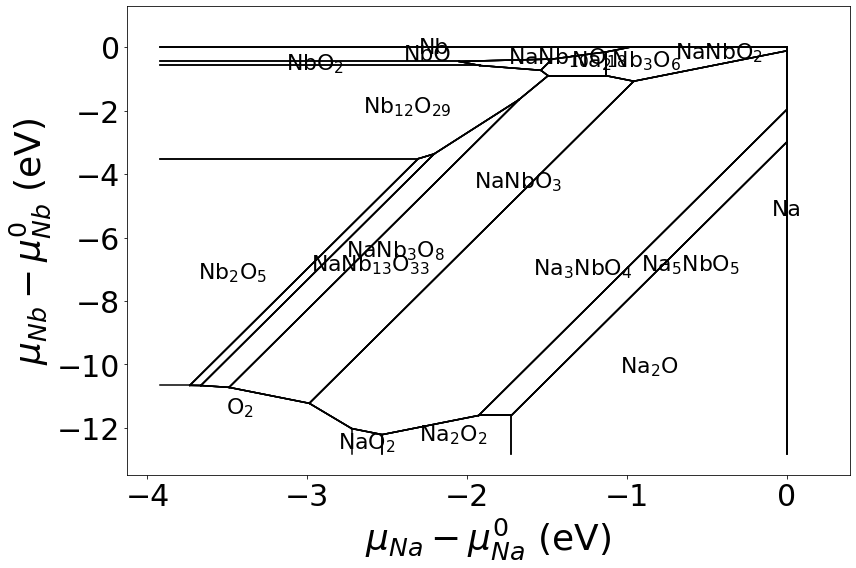

In [12]:
PDHandler(res_all.phase_diagram).get_stability_diagram(['Na','Nb']);

### import DOS with pymatgen

In [13]:
dos = get_object_from_json(FermiDos,'./data/NN_Pbcm_pure_fermi_dos.json')

### Plot formation energies

Get plot of the formation energies of all the defect species for a given set of chempots. (The chempots numbers for the dopands in this example are still not dependent on the chempot of the oxygen.


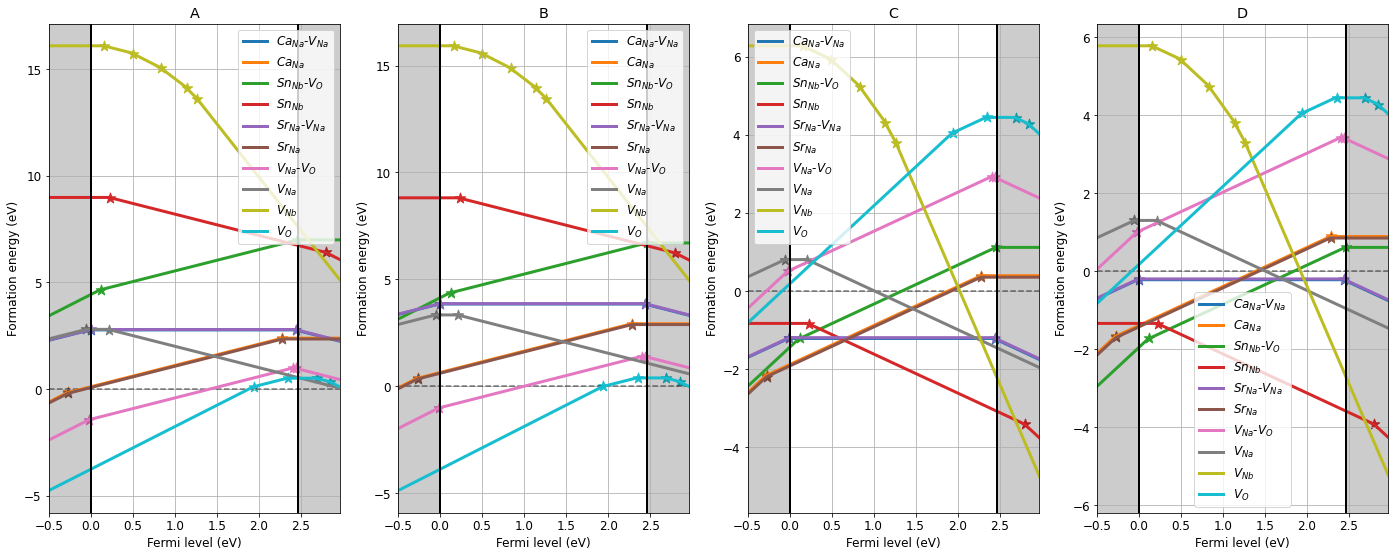

In [19]:
i = 0
for r,mu in res_all.items():
    i += 1
    da_all.plot(mu,get_subplot=True,subplot_settings=[1,4,i],title=r,plotsize=(3,1.5))

### Plot charge transition levels

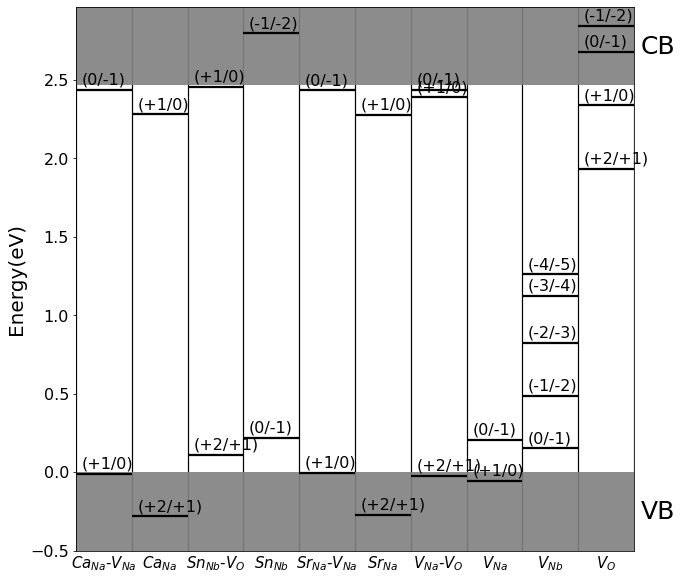

In [21]:
da_all.plot_ctl();

## Analyse vacancies

As a first example we evaluate the defect thermodynamics of the system with just single vacancies.
At first we need to filter the `DefectsAnalysis` object for the desired defect entries. Then we move to the analysis of the Fermi level and the oxygen partial pressure dependencies.

In [23]:
da = da_all.filter_entries(entry_class='SingleDefectEntry',elements=[]) # we create another DefectsAnalysis object

In [24]:
da.get_dataframe()

,symbol,delta atoms,charge,multiplicity
name,,,,
Vac_Na_mult32,$V_{Na}$,{Na: -1.0},-1,32
Vac_Na_mult32,$V_{Na}$,{Na: -1.0},0,32
Vac_Na_mult32,$V_{Na}$,{Na: -1.0},1,32
Vac_Nb_mult32,$V_{Nb}$,{Nb: -1.0},-1,32
Vac_Nb_mult32,$V_{Nb}$,{Nb: -1.0},-2,32
Vac_Nb_mult32,$V_{Nb}$,{Nb: -1.0},-3,32
Vac_Nb_mult32,$V_{Nb}$,{Nb: -1.0},-4,32
Vac_Nb_mult32,$V_{Nb}$,{Nb: -1.0},-5,32
Vac_Nb_mult32,$V_{Nb}$,{Nb: -1.0},0,32


In [26]:
res = res_all.filter_reservoirs(elements=['Na','Nb','O']) # filter reservoirs for only Na,Nb,O

In [27]:
res.get_dataframe()

,O,Nb,Na
A,-8.886032,-11.004249,-2.806536
B,-9.007432,-11.176406,-2.270180
C,-4.947955,-20.823385,-4.801630
D,-4.947955,-21.325097,-4.299918


### Calculate Fermi level dictated by charge neutrality

Inputs are chempots, temperature and DOS.

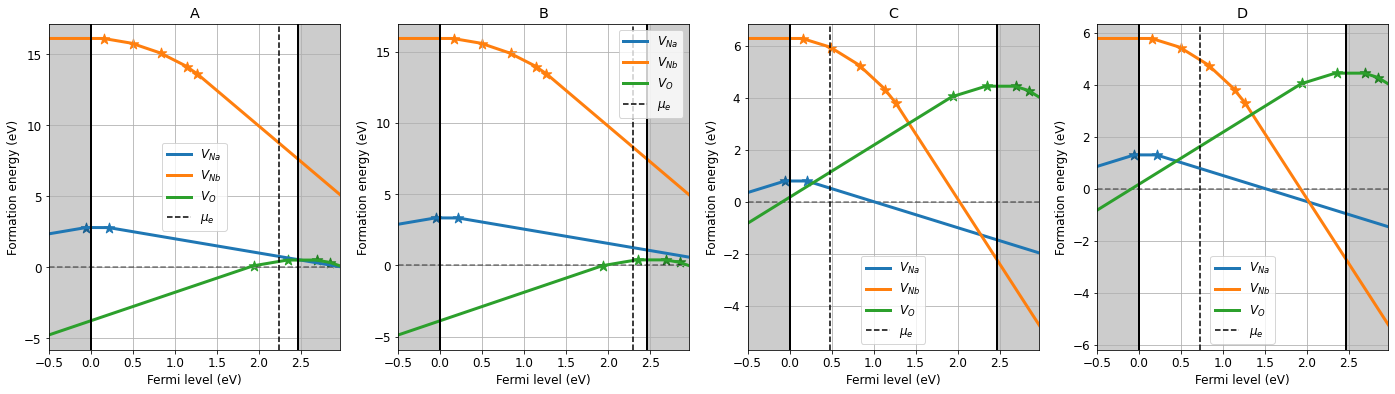

In [29]:
i = 0
for r,mu in res.items():
    i += 1
    mue = da.equilibrium_fermi_level(chemical_potentials=mu,temperature=300,bulk_dos=dos)
    da.plot(mu,fermi_level=mue,get_subplot=True,subplot_settings=[1,4,i],title=r,plotsize=(3,1))

## Partial pressure dependencies with PartialPressureAnalysis

The class `PartialPressureAnalysis` from the `pynter.defects.thermodynamics` module handles the calculations of the partial pressure dependencies. The initial step is defining the reservoirs corrisponding to the different oxygen partial pressures. $p_{O_{2}}$ is converted in $\mu_{O}$, and, if the phase diagram is ternary, we take the middle point in between the two stability boundary points (of the target composition) identified by the constant chempot line. This method only works if the target composition is a stable phase for the selected $\mu_{O}$ conditions (which makes sense physically). A workaround for more particular situations when the phase is not stable will be developed in the future. <br></br>
The analysis is carried out by calculating the Fermi level and consequently the defect concentrations for every defined reservoir. The new methods to fix defects concentrations and quenched conditions are included. <br></br>
For the pltting the `PartialPressurePlotter` class in the `pynter.defects.plotter` module is used.

In [31]:
comp = Composition('NaNbO3')
panalysis = PartialPressureAnalysis(defects_analysis=da,phase_diagram=res.phase_diagram,target_comp=comp,
                                    bulk_dos=dos,temperature=1000,frozen_defect_concentrations=None,
                                    external_defects=[])

### Calculate concentrations and Fermi levels 
In the example we set T=1000K

In [54]:
pressures,defect_concentrations,carrier_concentrations,fermi_levels= panalysis.get_concentrations(
            pressure_range=(-20,10),concentrations_output='total',npoints=20,get_fermi_levels=True)

#### Plots

In [38]:
plotter = PartialPressurePlotter()

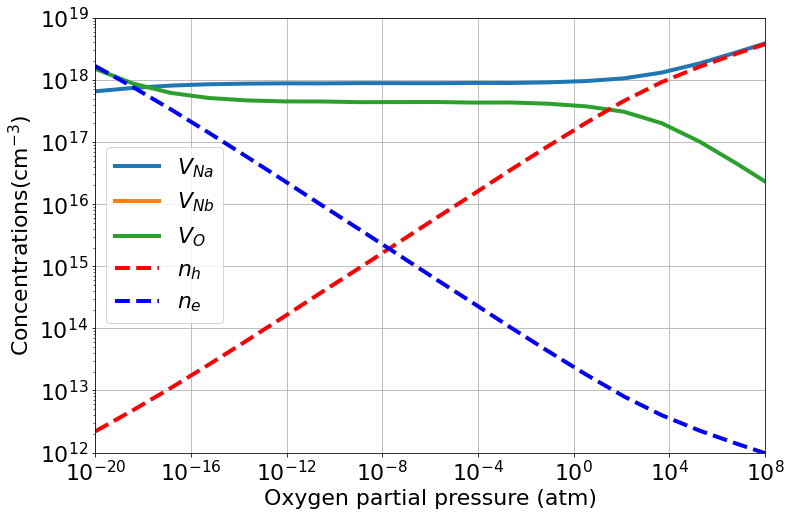

In [56]:
plotter.plot_concentrations(pressures,defect_concentrations,carrier_concentrations,concentrations_output='total',
                            ylim =(1e12,1e19));

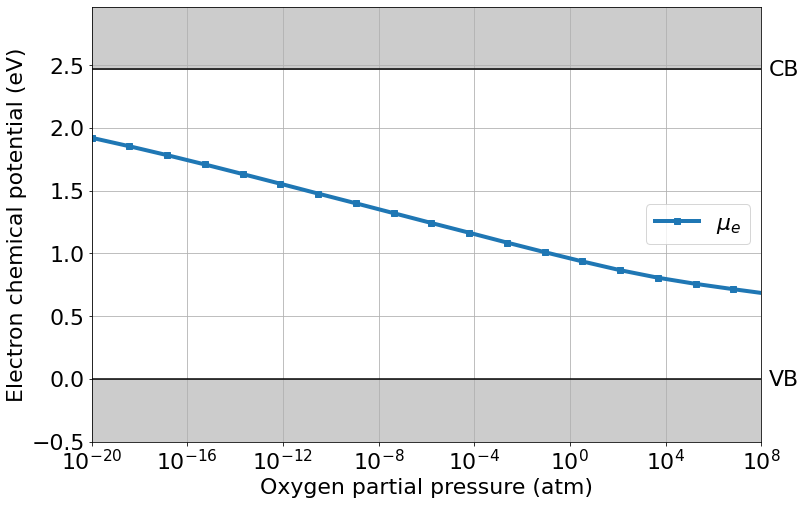

In [57]:
plotter.plot_fermi_level(pressures,fermi_levels,da.band_gap);

### Quenching analysis

Also the analysis of quenched systems can be performed. Now it is also possible to integrate it with fixed defect concentrations and it's possible to select which defect species to quench and which species are allowed to equilibrate. In this example we quench from 1000K to 300K.

In [58]:
# save previous eq fermi levels
fermi_levels = {'equilibrium':fermi_levels}
# if quenched_species is None all species are quenched
pressures,quenched_mue = panalysis.get_quenched_fermi_levels(initial_temperature=1000,final_temperature=300,
                                                            quenched_species=None,ignore_multiplicity=True,
                                                            pressure_range=(-20,10),npoints=20)

/home/lorenzo/pynter/pynter/defects/pmg_dos.py:1029: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp((fermi - E) / (_cd("Boltzmann constant in eV/K") * T)))


In [59]:
fermi_levels['quenched'] = quenched_mue

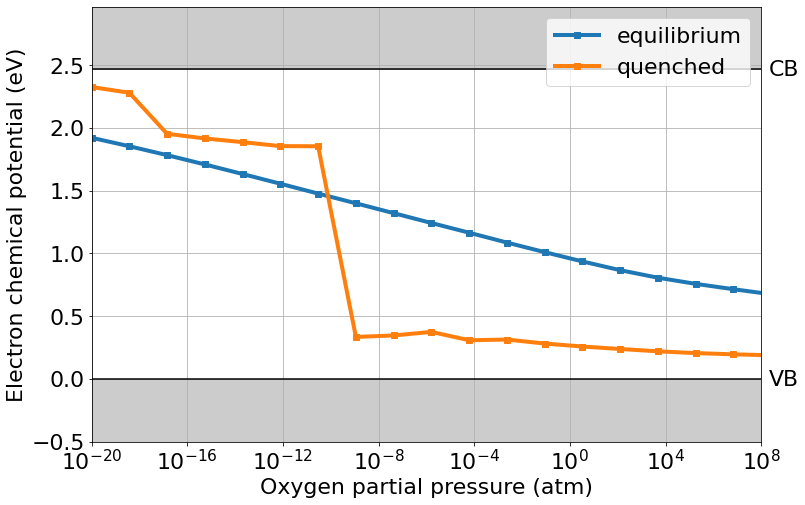

In [60]:
plotter.plot_fermi_level(pressures,fermi_levels,da.band_gap); # the plotter can read also dict of fermi levels

### Partial Quenching

Now we quench only Na and Nb but let O equilibrate. 

In [65]:
quenched_species = ['Vac_Na','Vac_Nb']
pressures,p_quenched_mue = panalysis.get_quenched_fermi_levels(initial_temperature=1000,final_temperature=300,
                                                    quenched_species=quenched_species,ignore_multiplicity=True,
                                                    pressure_range=(-20,10),npoints=20)

/home/lorenzo/pynter/pynter/defects/pmg_dos.py:1029: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp((fermi - E) / (_cd("Boltzmann constant in eV/K") * T)))


In [66]:
fermi_levels['partially_quenched'] = p_quenched_mue

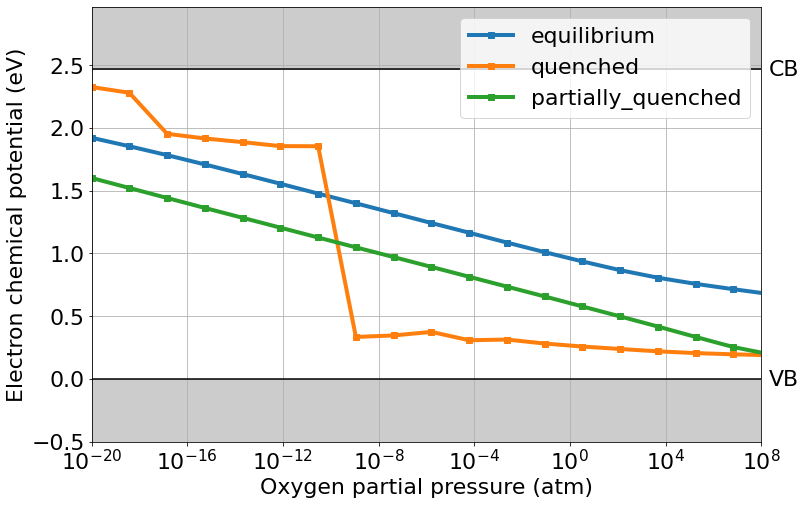

In [67]:
plotter.plot_fermi_level(pressures,fermi_levels,da.band_gap); # the plotter can read also dict of fermi levels

### Calculate conductivity

The same analysis can be performed for the conductivity, which is calculated from the defect and carriers concentrations. A dictionary with the mobilities of the different species is needed.

In [72]:
mobility_el = 1.7e-05 # at 1000/T = 1.6 K^-1 -> T = 625
gamma0 = 1e12 # typical value for attempt frequency [Hz]
lat_param = 3.9670000000000004e-10 # in meters
D0 = 6*gamma0*lat_param**2
T = 1000

#values for cubic NN
mobilities = {
    'electrons':mobility_el,
    'holes':0.5*mobility_el,
    'Vac_Na': D0 * np.exp(-1.4/(kb*T)) /(kb*T),
    'Vac_Nb': D0 * np.exp(-1e5/(kb*T)) /(kb*T), # we put random high value of migr barrier , we dont consider Nb
    'Vac_O': D0 * np.exp(-0.4/(kb*T)) /(kb*T)
    }

In [73]:
partial_pressures,conductivities = panalysis.get_conductivities(mobilities=mobilities,ignore_multiplicity=True,
                                                               pressure_range=(-20,10),npoints=20,temperature=T)

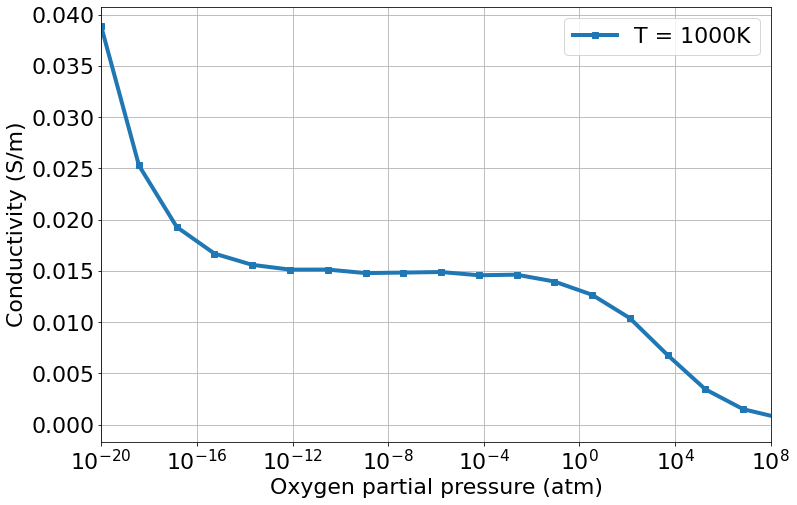

In [76]:
plotter.plot_conductivity(partial_pressures,conductivities,label='T = 1000K');